# 데이터 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/train.csv')
data.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [3]:
data = pd.read_csv('./data/train.csv')
data.columns = ['date', 'day', 'total', 'vacation', 'out', 'late','home', 'morning', 'menu', 'dinner', 'demand', 'demand2']
data = data[['date', 'day', 'total', 'vacation', 'out', 'late','home', 'menu', 'demand']]
data['date'] = pd.to_datetime(data['date'])
data['day'] = pd.to_datetime(data['date']).dt.weekday + 1

##total_num 대비 demand의 비율을 demand로 정의
data['total_num'] = data['total'] - data['vacation'] - data['out'] - data['home']
data['demand'] = data['demand']/data['total_num']
data = data[['date', 'day', 'total','menu', 'demand']]
data

,date,day,total,menu,demand
0,2016-02-01,1,2601,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...",0.432736
1,2016-02-02,2,2601,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...",0.364592
2,2016-02-03,3,2601,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...",0.430021
3,2016-02-04,4,2601,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...",0.429513
4,2016-02-05,5,2601,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...",0.431839
...,...,...,...,...,...
1200,2021-01-20,3,2983,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,0.471324
1201,2021-01-21,4,2983,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,0.360329
1202,2021-01-22,5,2983,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,0.265962
1203,2021-01-25,1,2983,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,0.477880


In [82]:
def make_menu_token(data):
    main_menu_1 = []
    main_menu_2 = []
    main_menu_3 = []
    for day in range(len(data)):
        tmp = data.iloc[day, 3].split(' ') # 공백으로 문자열 구분 
        tmp = ' '.join(tmp).split()    # 빈 원소 삭제
    
        search = '('   # 원산지 정보는 삭제
        exception = 'New'
        for menu in tmp:
            if search in menu and exception not in menu:
                tmp.remove(menu)
        
        main_menu_1.append(tmp[0])
        main_menu_2.append(tmp[1])
        main_menu_3.append(tmp[2])
    data['main_1'] = main_menu_1
    data['main_2'] = main_menu_2
    data['main_3'] = main_menu_3
    
def get_ingredient(data):
    ing_df = pd.DataFrame(np.zeros((data.shape[0], 4)), columns=['해산물', '육류', '조류', '채소'])

    for t in range(data.shape[0]):
        token = data.iloc[t, 5] + data.iloc[t,6]+data.iloc[t, 7]

        found = False

        # 해산물
        seafood_keywords = ['연어', '골뱅이', '열기', '조기', '탕수어', '양장피', '홍어', '명태', '적어', '장어', '동태', '산슬', 
                            '코다리', '가자미', '해물', '생선', '새우', '꽁치', '갈치', '임연수', '삼치', '고등어', '굴비', 
                            '오징어', '쭈꾸미', '주꾸미', '낙지', '문어', '페스토', '알리오', '해물', '참치', '꽃게', '대구']
        if any(word in token for word in seafood_keywords):
            ing_df.at[t, '해산물'] = 1
            found = True

        # 육류
        meat_keywords = ['왕갈비', '소갈비', '장조림', '불고기', '차돌', '육전', '너비아니', '떡갈비', '함박', '쇠고기', '소고기', 
                         '쇠', '궁중떡찜', '동그랑땡', '만두', '완자', '피자', '스파게티', '짜장', '비엔나', '바베큐', '돈육', '갈비', '제육', '소세지', '꼬지', 
                        '탕수육', '미트볼', '삼겹', '목살', '돈까스', '보쌈', '돈가스', '동파육', '카츠', '육', '돼지', '족발','카레','잡채','설렁탕','두루치기','돈사태','보쌈']
        if any(word in token for word in meat_keywords) or (token.startswith('소') and not token.startswith('소세')):
            ing_df.at[t, '육류'] = 1
            found = True

        # 조류
        poultry_keywords = ['궁보계정', '삼계탕', '윙', '유린기', '깐풍', '닭', '치킨', '후라이드', '오리', '치킨']
        if any(word in token for word in poultry_keywords):
            ing_df.at[t, '조류'] = 1
            found = True

        # 채소류
        veg_keywords = ['두부', '꼬치산적', '고추', '양파', '부추', '고구마', '감자', '깻잎', '샐러드', '시금치', '야채', '계란', 
                        '맛살', '달래', '김치', '메추리알', '모듬튀김', '된장', '전병', '파프리카', '콩나물', '채소']
        if not found and any(word in token for word in veg_keywords) or token.endswith('두부'):
            ing_df.at[t, '채소'] = 1
            found = True

        # 기타 분류
        if not found:
            ing_df.at[t, 'etc'] = 1
            print(token, 'im guitar')

    return ing_df

##making menu token 
make_menu_token(data)
ingredient = get_ingredient(data)
data['seafood'] = ingredient['해산물']
data['meat'] = ingredient['육류']
data['wing'] = ingredient['조류']
data['vege'] = ingredient['채소']

## 데이터 시각화, 해석

<Axes: xlabel='date'>

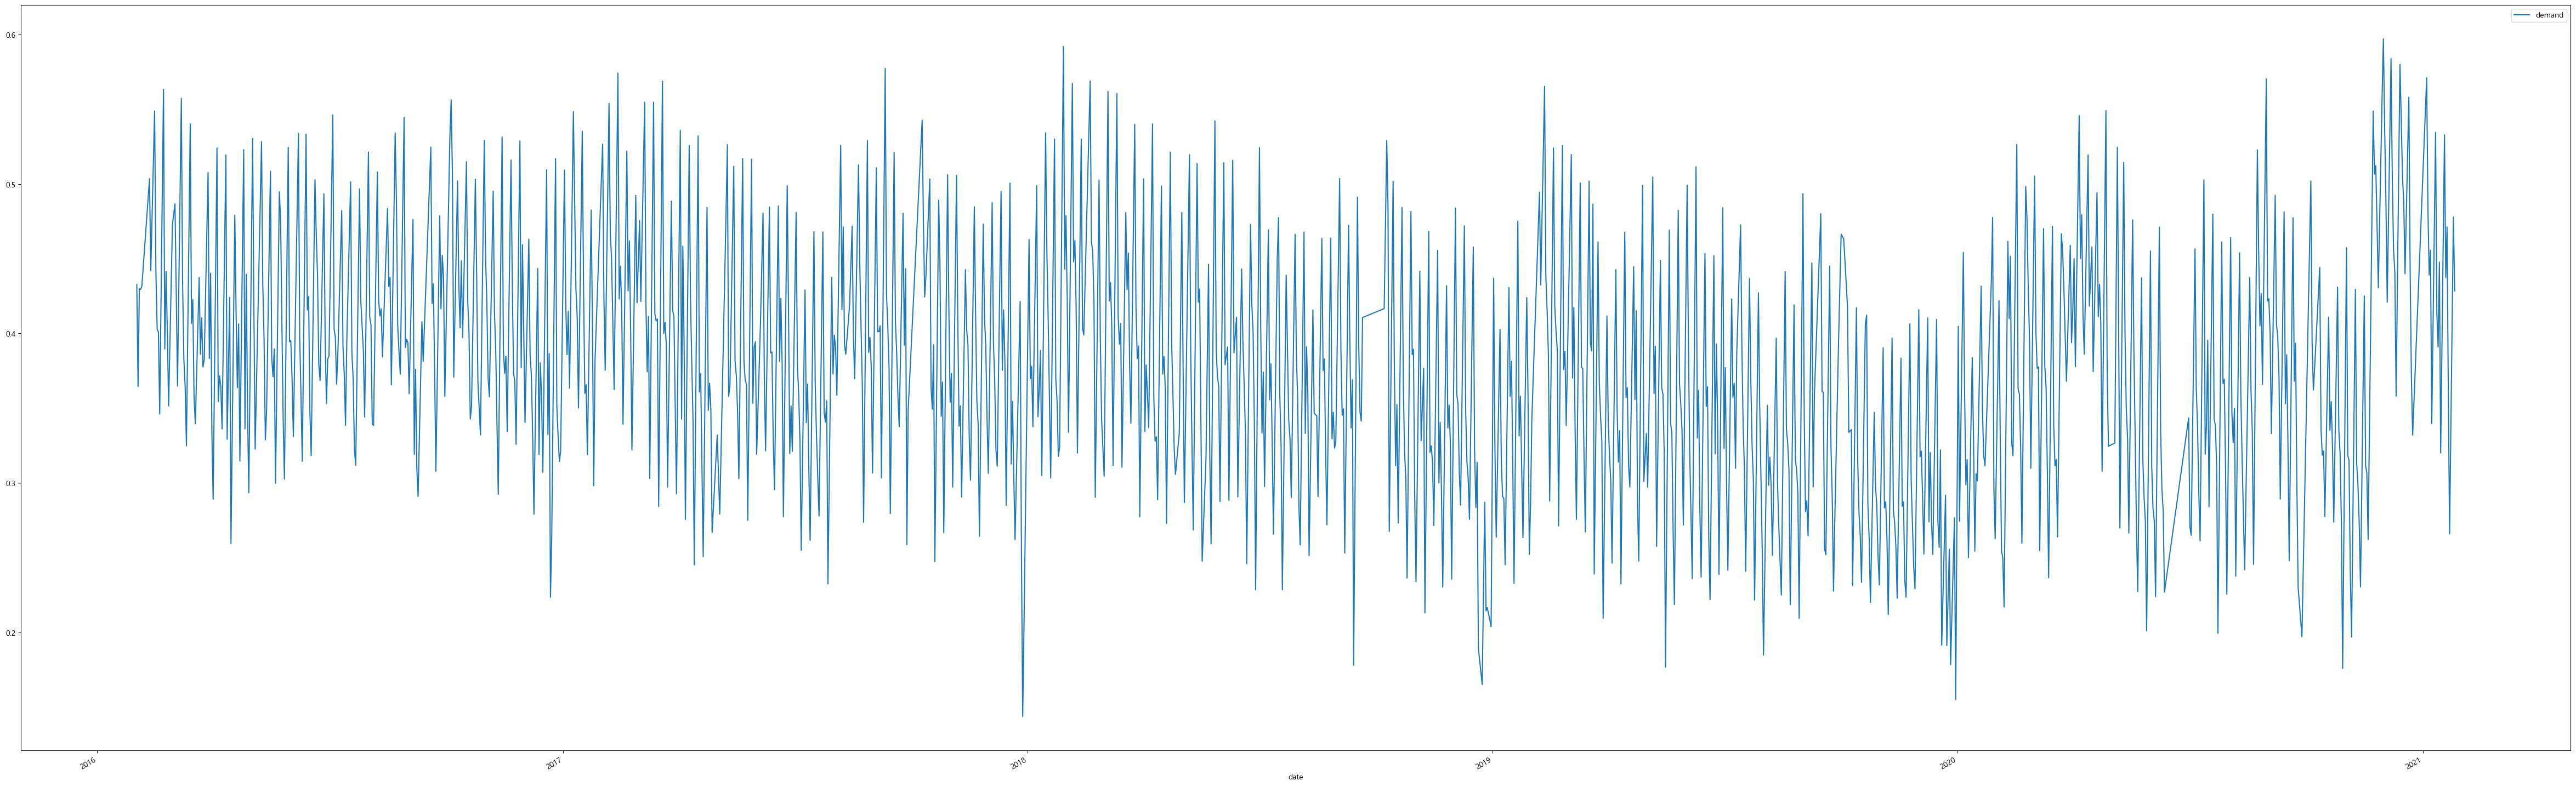

In [83]:
data.plot(x='date', y='demand', figsize = (60,20))

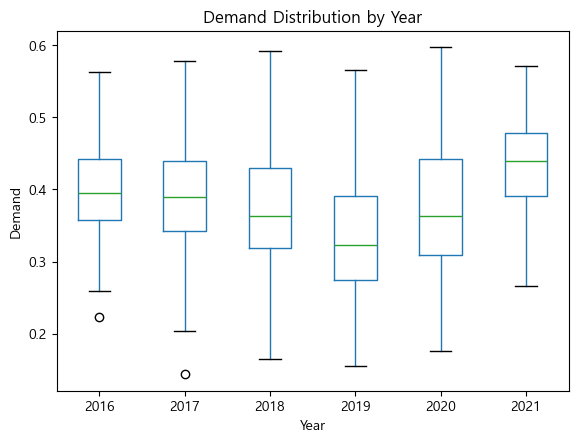

In [84]:
data['year'] = data['date'].dt.year
data.boxplot(column='demand', by='year', grid=False)

# 그래프 꾸미기
plt.title('Demand Distribution by Year')
plt.suptitle('')  # 기본 제목 제거
plt.xlabel('Year')
plt.ylabel('Demand')
plt.show()

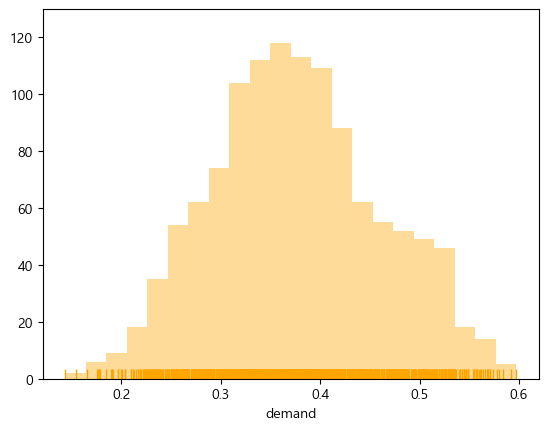

In [85]:
sns.distplot(data["demand"], color = 'orange', kde = False, rug = True)
plt.show()

## BEST & WORST 메뉴 파악

In [86]:
data.sort_values(by='demand', ascending=False)

,date,day,total,menu,demand,main_1,main_2,main_3,seafood,meat,wing,vege,year
1170,2020-12-01,2,2990,쌀밥/찰보리밥/찰현미밥 김치두부국 LA갈비구이 한식잡채 삼색유자청무침 포기김치/오프...,0.597203,쌀밥/찰보리밥/찰현미밥,김치두부국,LA갈비구이,0.0,1.0,0.0,0.0,2020
490,2018-01-29,1,2655,쌀밥/잡곡밥 (쌀:국내산) 봄동된장국 가래떡돼지갈비찜 콩나물겨자채 참나물무침 ...,0.592144,쌀밥/잡곡밥,봄동된장국,가래떡돼지갈비찜,0.0,1.0,0.0,0.0,2018
1174,2020-12-07,1,2990,쌀밥/흑미밥/찰현미밥 유부주머니국 삼겹살김치볶음 두부구이 어묵간장조림 포기김치/귤 ...,0.584035,쌀밥/흑미밥/찰현미밥,유부주머니국,삼겹살김치볶음,0.0,1.0,0.0,0.0,2020
1179,2020-12-14,1,2990,쌀밥/흑미밥/찰현미밥 (New)누룽지장각백숙 (New)캔꽁치튀김 쫄면채소무침 풋고추...,0.580096,쌀밥/흑미밥/찰현미밥,(New)누룽지장각백숙,(New)캔꽁치튀김,1.0,0.0,0.0,0.0,2020
398,2017-09-11,1,2642,쌀밥/잡곡밥 (쌀:국내산) 시래기된장국 유자청제육볶음 오꼬노미야끼계란말이 치커...,0.577417,쌀밥/잡곡밥,시래기된장국,유자청제육볶음,0.0,1.0,0.0,0.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,2019-05-17,5,2825,쌀밥/잡곡밥 (쌀:국내산) 버섯매운탕 (소고기:호주산) 탕수어 (동태:러시아산) 온...,0.176623,쌀밥/잡곡밥,버섯매운탕,탕수어,1.0,0.0,0.0,0.0,2019
1148,2020-10-30,5,3008,쌀밥/흑미밥/찰현미밥 건새우아욱국 쇠고기숙주볶음 적어양념장구이 통들깨부추무침 무생채...,0.175873,쌀밥/흑미밥/찰현미밥,건새우아욱국,쇠고기숙주볶음,1.0,1.0,0.0,0.0,2020
705,2018-12-24,1,2846,쌀밥/잡곡밥 (쌀:국내산) 열무된장국 훈제오리구이 매운어묵볶음 쌈무/부추생채 ...,0.165086,쌀밥/잡곡밥,열무된장국,훈제오리구이,0.0,0.0,1.0,0.0,2018
955,2019-12-31,2,3111,쌀밥/잡곡밥 (쌀:국내산) 배추된장국 닭볶음탕 (닭:국내산) 부추깻잎전 양배추쌈...,0.154905,쌀밥/잡곡밥,배추된장국,닭볶음탕,0.0,0.0,1.0,0.0,2019


## 연도별 수요 파악

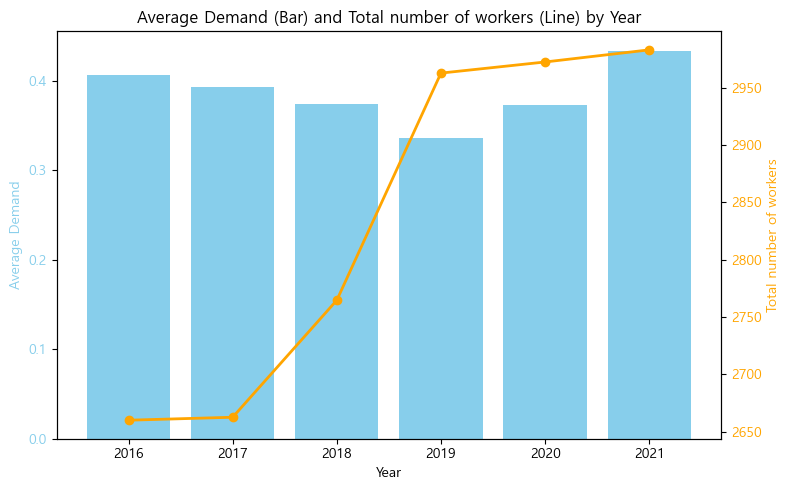

In [67]:
data['year'] = data['date'].dt.year
avg_demand = data.groupby('year')['demand'].mean()
avg_total = data.groupby('year')['total'].mean()

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(8, 5))

# 막대 그래프 (demand)
ax1.bar(avg_demand.index, avg_demand.values, color='skyblue', label='Average Demand')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Demand', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# 꺾은선 그래프 (total)
ax2 = ax1.twinx()
ax2.plot(avg_total.index, avg_total.values, color='orange', marker='o', linewidth=2, label='Average Total')
ax2.set_ylabel('Total number of workers', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 제목 및 여백 정리
plt.title('Average Demand (Bar) and Total number of workers (Line) by Year')
fig.tight_layout()
plt.show()

## 요일별 수요 파악

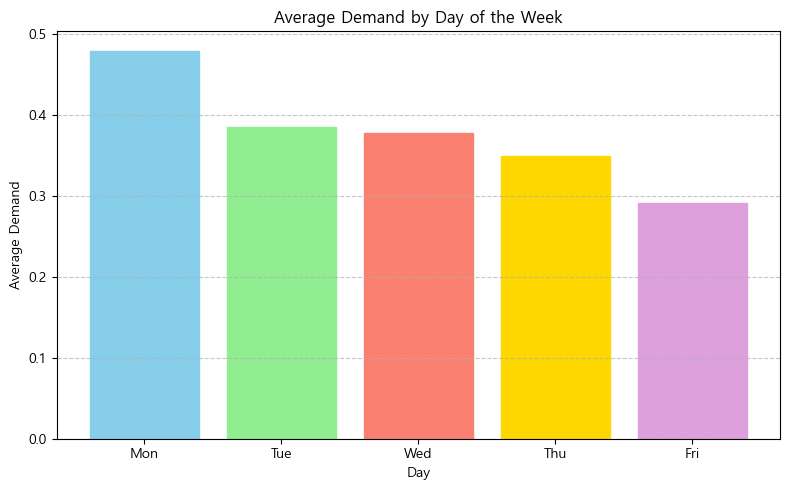

In [68]:
day_map = {
    1: 'Mon',
    2: 'Tue',
    3: 'Wed',
    4: 'Thu',
    5: 'Fri'
}

# day 숫자를 문자열로 변환
data['day_name'] = data['day'].map(day_map)

# 요일별 평균 수요 계산
avg_demand = data.groupby('day_name')['demand'].mean()

# 요일 순서를 유지하기 위해 정렬
ordered_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
avg_demand = avg_demand.reindex(ordered_days)

# 시각화

plt.figure(figsize=(8, 5))
bars = plt.bar(avg_demand.index, avg_demand.values)
bar_colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'plum']
for bar, color in zip(bars, bar_colors):
    bar.set_color(color)

plt.title('Average Demand by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Average Demand')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 월별 수요 파악

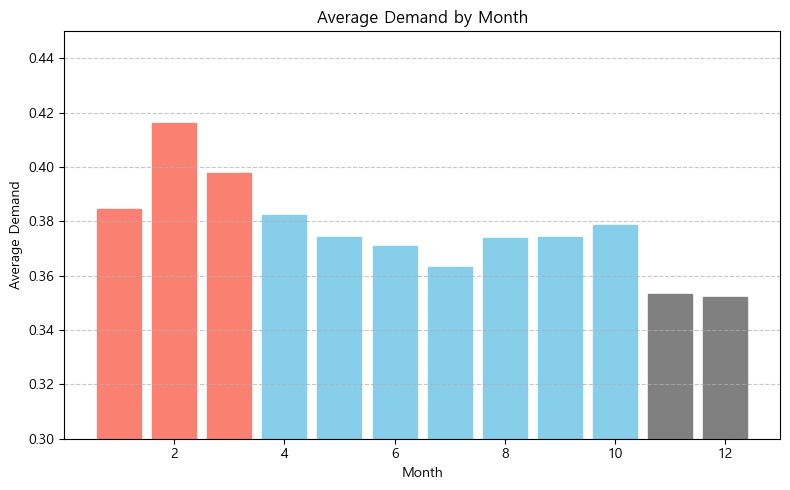

In [69]:
data['month'] = data['date'].dt.month
avg_demand = data.groupby('month')['demand'].mean()

# 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
bars = plt.bar(avg_demand.index, avg_demand.values)
bar_colors = ['salmon','salmon','salmon','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','gray','gray' ]
for bar, color in zip(bars, bar_colors):
    bar.set_color(color)

plt.title('Average Demand by Month')
plt.xlabel('Month')
plt.ylabel('Average Demand')
plt.ylim(0.3,0.45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [70]:
data

,date,day,total,menu,demand,main_1,main_2,main_3,seafood,meat,wing,vege,year,day_name,month
0,2016-02-01,1,2601,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...",0.432736,쌀밥/잡곡밥,오징어찌개,쇠불고기,1.0,1.0,0.0,0.0,2016,Mon,2
1,2016-02-02,2,2601,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...",0.364592,쌀밥/잡곡밥,김치찌개,가자미튀김,1.0,0.0,0.0,0.0,2016,Tue,2
2,2016-02-03,3,2601,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...",0.430021,카레덮밥,팽이장국,치킨핑거,0.0,1.0,1.0,0.0,2016,Wed,2
3,2016-02-04,4,2601,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...",0.429513,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,1.0,1.0,0.0,0.0,2016,Thu,2
4,2016-02-05,5,2601,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...",0.431839,쌀밥/잡곡밥,떡국,돈육씨앗강정,0.0,1.0,0.0,0.0,2016,Fri,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,3,2983,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,0.471324,쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크,0.0,1.0,0.0,0.0,2021,Wed,1
1201,2021-01-21,4,2983,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,0.360329,쌀밥/수수밥/찰현미밥,냉이된장국,동파육,0.0,1.0,0.0,0.0,2021,Thu,1
1202,2021-01-22,5,2983,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,0.265962,전주비빔밥*약고추장,계란파국,요거닭,0.0,0.0,1.0,0.0,2021,Fri,1
1203,2021-01-25,1,2983,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,0.477880,쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,0.0,1.0,0.0,0.0,2021,Mon,1


In [71]:
from statistics import mean
list_mon = []
list_tue = []
list_wed = []
list_thu = []
list_fri = []

for i in range(data.shape[0]):
    day = data.iloc[i,1]
    if day == 1:
        list_mon.append(data.iloc[i,4])
    elif day == 2:
        list_tue.append(data.iloc[i,4])
    elif day == 3:
        list_wed.append(data.iloc[i,4])
    elif day == 4:
        list_thu.append(data.iloc[i,4])
    else:
        list_fri.append(data.iloc[i,4])
        
mon_avg = mean(list_mon)
tue_avg = mean(list_tue)
wed_avg = mean(list_wed)
thu_avg = mean(list_thu)
fri_avg = mean(list_fri)
day_avg =[]
for i in range(data.shape[0]):
    day = data.iloc[i,1]
    if day == 1:
        day_avg.append(mon_avg)
    elif day == 2:
        day_avg.append(tue_avg)
    elif day == 3:
        day_avg.append(wed_avg)
    elif day == 4:
        day_avg.append(thu_avg)
    else:
        day_avg.append(fri_avg)
data['day_avg'] = day_avg

data['fav_score'] = data['meat']-data['vege']-data['seafood']

data['meat'] = data['meat'].astype(int)
data['seafood'] = data['seafood'].astype(int)
data['vege'] = data['vege'].astype(int)
data['wing'] = data['wing'].astype(int)

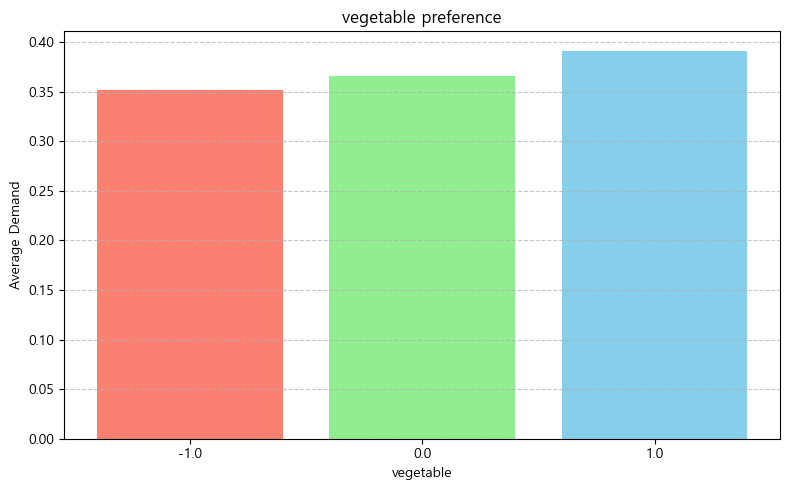

In [72]:
# 재료별 선호도
avg_demand = data.groupby('fav_score')['demand'].mean()

# 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
colors = ['salmon', 'lightgreen','skyblue']
bars = plt.bar(range(len(avg_demand)), avg_demand.values, color=colors)
plt.xticks(ticks=range(len(avg_demand)), labels=avg_demand.index)

plt.title('vegetable preference')
plt.xlabel('vegetable')
plt.ylabel('Average Demand')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 실습

## 0. 라이브러리 호출 및 기본 설정
python version 3.11.11

In [114]:
# !pip install tqdm
# !pip install statsmodels
# !pip install matplotlib
# !pip install tensorflow
# !pip install seaborn
# !pip install scikit-learn

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from math import sqrt
import itertools
import re
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rcParams
rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## 1. 데이터 전처리

### 1-1. 기존 변수 정리

In [115]:
data=pd.read_csv('./data/train.csv')

# 일자 관련 변수: 년도, 월, 일, 요일
year=[]
for i in range(len(data['일자'])) :
  year.append(data.iloc[i,0][0:4])
data['year']=year

mon=[]
for i in range(len(data['일자'])) :
  mon.append(data.iloc[i,0][5:7])
data['월']=mon

date=[]
for i in range(len(data['일자'])) :
  date.append(data.iloc[i,0][8:10])
data['date']=date

yoil=[]
for i in range(len(data)) : 
  if data.iloc[i,1]=='월' : yoil.append(0)
  if data.iloc[i,1]=='화' : yoil.append(1)
  if data.iloc[i,1]=='수' : yoil.append(2)
  if data.iloc[i,1]=='목' : yoil.append(3)
  if data.iloc[i,1]=='금' : yoil.append(4)
data['요일']=yoil

# 랜덤포레스트에서 categorical로 처리하기 위해 데이터 형변환
data['date']=data['date'].astype(int)
data['월']=data['월'].astype(int)
data['year']=data['year'].astype(int)

#필요한 컬럼 선택
data=data[['일자','year', '월', 'date', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', '중식메뉴', '중식계']]

### 1-2. 새로운 변수 추가

- 문화의 날, 공휴일, 날씨, 불쾌지수, 코로나 등 유의미하다고 생각하는 데이터를 추가로 가져와서 활용할 수 있음.
- 본 실습에서는 메인 메뉴 3가지의 "선호 지수"를 산출하여 새로운 변수로 활용함.

In [116]:
# 메인메뉴 1,2,3 추출
def make_menu_token(data):
    main_menu_1 = []
    main_menu_2 = []
    main_menu_3 = []
    
    for idx in range(len(data)):
        # 중식메뉴 문자열을 공백 기준으로 나눈 뒤, 빈 항목 제거
        tmp = data.loc[idx, '중식메뉴'].split()
        
        cleaned_menu = []
        for menu in tmp:
            # 괄호 안 정보 제거
            menu_cleaned = re.sub(r'\(.*?\)', '', menu).strip()
            if menu_cleaned:  # 공백이 아닌 경우에만 추가
                cleaned_menu.append(menu_cleaned)
        
        # 3개의 메인메뉴가 존재한다고 가정
        main_menu_1.append(cleaned_menu[0] if len(cleaned_menu) > 0 else '')
        main_menu_2.append(cleaned_menu[1] if len(cleaned_menu) > 1 else '')
        main_menu_3.append(cleaned_menu[2] if len(cleaned_menu) > 2 else '')

    data['메인메뉴1'] = main_menu_1
    data['메인메뉴2'] = main_menu_2
    data['메인메뉴3'] = main_menu_3
    
make_menu_token(data)

In [117]:
##실질인원 산출 후 실질인원 대비 중식계의 비율을 식사비율로 정의
data['실질인원'] = data['본사정원수'] - data['본사휴가자수'] - data['본사출장자수'] - data['현본사소속재택근무자수']
data['식사비율'] = data['중식계']/data['실질인원']

In [118]:
# 데이터프레임: data
menu_scores = []

# 메뉴와 위치 정보 (컬럼 이름과 menu 위치)
menu_columns = ['메인메뉴1', '메인메뉴2', '메인메뉴3']
for col in menu_columns:
    tmp_df = data[[col, '식사비율']].copy()
    tmp_df.columns = ['중식메뉴', '식사비율']
    menu_scores.append(tmp_df)

# concat해서 메뉴별 demand 수집
all_menu_demand = pd.concat(menu_scores)

# 메뉴별 평균 demand 계산 (선호도)
menu_preference = all_menu_demand.groupby('중식메뉴').mean().sort_values(by='식사비율', ascending=False)
menu_preference = menu_preference.reset_index()
menu_preference.columns = ['메뉴명', '선호지수']
menu_preference


,메뉴명,선호지수
0,가래떡돼지갈비찜,0.592144
1,삼겹살김치볶음,0.584035
2,누룽지장각백숙,0.580096
3,캔꽁치튀김,0.580096
4,봉추찜닭,0.571138
...,...,...
725,야채볶음밥*짜장소스,0.211965
726,해물수제비국,0.199380
727,수제탕수육,0.196911
728,감자양파국,0.191405


In [119]:
# 선호지수를 원래 데이터에 매핑
## 메뉴-점수 매핑 딕셔너리 생성
score_map = dict(zip(menu_preference['메뉴명'], menu_preference['선호지수']))

## 점수 컬럼 추가
data['메인메뉴1_선호지수'] = data['메인메뉴1'].map(score_map)
data['메인메뉴2_선호지수'] = data['메인메뉴2'].map(score_map)
data['메인메뉴3_선호지수'] = data['메인메뉴3'].map(score_map)

data = data[['year','월','date','요일', '실질인원', '메인메뉴1','메인메뉴2','메인메뉴3', '메인메뉴1_선호지수', '메인메뉴2_선호지수', '메인메뉴3_선호지수', '식사비율']]
data

,year,월,date,요일,실질인원,메인메뉴1,메인메뉴2,메인메뉴3,메인메뉴1_선호지수,메인메뉴2_선호지수,메인메뉴3_선호지수,식사비율
0,2016,2,1,0,2401.0,쌀밥/잡곡밥,오징어찌개,쇠불고기,0.379554,0.432736,0.435412,0.432736
1,2016,2,2,1,2378.0,쌀밥/잡곡밥,김치찌개,가자미튀김,0.379554,0.392490,0.325286,0.364592
2,2016,2,3,2,2365.0,카레덮밥,팽이장국,치킨핑거,0.366182,0.374659,0.353322,0.430021
3,2016,2,4,3,2277.0,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,0.379554,0.390525,0.337742,0.429513
4,2016,2,5,4,2142.0,쌀밥/잡곡밥,떡국,돈육씨앗강정,0.379554,0.395263,0.431839,0.431839
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021,1,20,2,2319.0,쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크,0.393360,0.373795,0.471324,0.471324
1201,2021,1,21,3,2309.0,쌀밥/수수밥/찰현미밥,냉이된장국,동파육,0.372526,0.370020,0.399378,0.360329
1202,2021,1,22,4,2177.0,전주비빔밥*약고추장,계란파국,요거닭,0.265962,0.265962,0.265962,0.265962
1203,2021,1,25,0,2396.0,쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,0.393360,0.477880,0.485043,0.477880


## 2. 회귀분석

### 2-1. 데이터 분할

In [120]:
# 학습(train) / 테스트(test) 세트 분리
train = data.iloc[:-300].copy()
test = data.iloc[-300:].copy()

### 2-2. 회귀모델 설계: 변수 선택 및 모델링

회귀 입력 변수 예시: 연, 월, 요일, 메인메뉴_선호지수, 전일 식수 인원(시차 변수)

In [121]:
# 필요한 열만 추출
features = ['year', '월', '요일', '메인메뉴1_선호지수', '메인메뉴2_선호지수', '메인메뉴3_선호지수']
target = '식사비율'

# 시차 변수는 첫 번째 행에서 NaN 발생 → 제거
train = train.dropna()
test = test.dropna()

# 모델 입력값 구성
X_train_raw = train[features]
X_test_raw = test[features]
y_train = train['식사비율']
y_test = test['식사비율']

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)

# DataFrame으로 다시 변환
X_train = pd.DataFrame(X_train_scaled, columns=features, index=X_train_raw.index)
X_test = pd.DataFrame(X_test_scaled, columns=features, index=X_test_raw.index)

# 상수항 추가 (회귀분석의 절편을 위해)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

### 2-3. 회귀 모델 학습 및 예측

In [122]:
# 회귀 모델 학습
model = sm.OLS(y_train, X_train)
results = model.fit()

# 결과 요약
print(results.summary())

# 예측
y_pred = results.predict(X_test)

                            OLS Regression Results                            
Dep. Variable:                   식사비율   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     341.5
Date:                Thu, 05 Jun 2025   Prob (F-statistic):          9.12e-228
Time:                        17:53:58   Log-Likelihood:                 1523.3
No. Observations:                 905   AIC:                            -3033.
Df Residuals:                     898   BIC:                            -2999.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3813      0.002    254.217      0.0

### 2-4. 성능 평가

In [123]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE  (평균 절대 오차):   {mae:.2f}")
print(f"RMSE (평균 제곱근 오차): {rmse:.2f}")
print(f"R²   (설명력):          {r2:.4f}")

MAE  (평균 절대 오차):   0.05
RMSE (평균 제곱근 오차): 0.00
R²   (설명력):          0.5195


### 2-5. 시각화: 예측값 vs 실제값

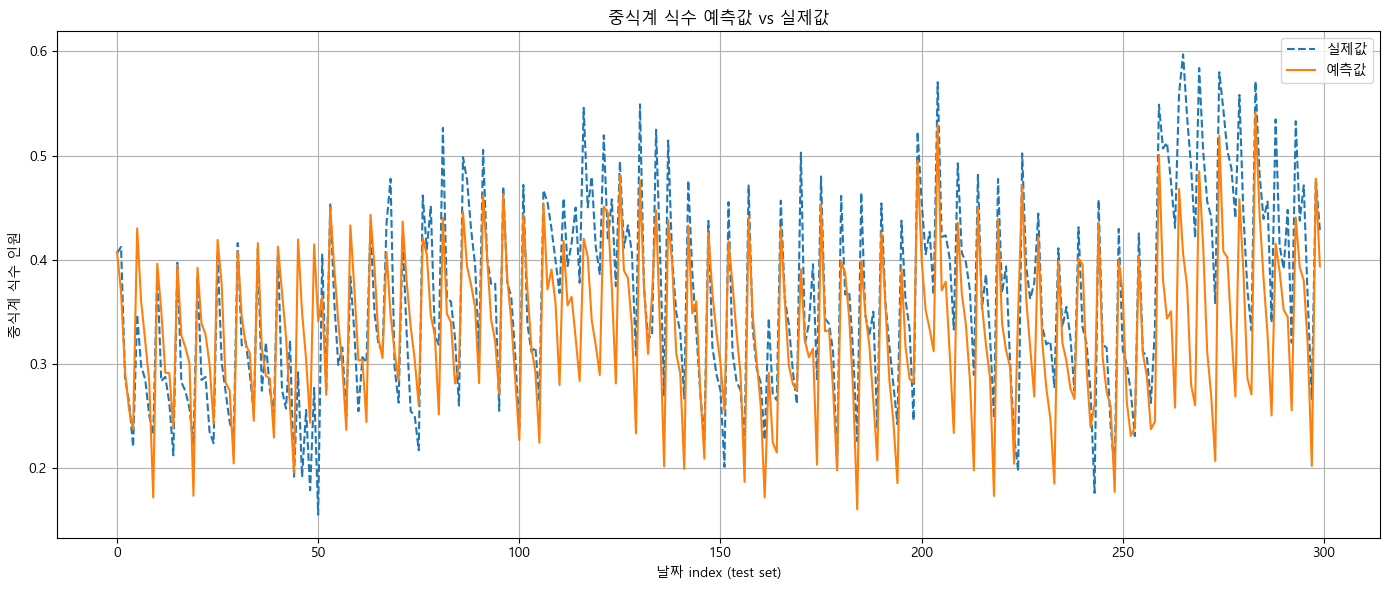

In [124]:
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='실제값', linestyle='--')
plt.plot(y_pred.values, label='예측값', linestyle='-')
plt.title('중식계 식수 예측값 vs 실제값')
plt.xlabel('날짜 index (test set)')
plt.ylabel('중식계 식수 인원')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. 계절성과 추세를 반영하는 시계열 수요 예측 모델
- SARIMA
- Holt-Winters
- Prophet (conda terminal에서 conda install -c conda-forge prophet 명령어로 prophet 설치 필요)

### 3-1. 데이터 전처리 및 분할

In [15]:
# DataFrame 구성
data=pd.read_csv('./data/train.csv')

#필요한 컬럼 선택
data=data[['일자', '본사정원수', '본사휴가자수', '본사출장자수', '현본사소속재택근무자수', '중식계']]

##실질인원 산출 후 실질인원 대비 중식계의 비율을 식사비율로 정의
data['실질인원'] = data['본사정원수'] - data['본사휴가자수'] - data['본사출장자수'] - data['현본사소속재택근무자수']
data['식사비율'] = data['중식계']/data['실질인원']

data_ = data[['일자', '식사비율']]
data_.set_index('일자', inplace=True)

# 학습/테스트 분리
train = data_.iloc[:-50]
test = data_.iloc[-50:]


### 3-2. 파라미터 탐색

In [16]:
# 탐색할 파라미터 범위
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
s = 5  # 주 단위위 계절성

# 파라미터 조합 생성
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q))

# 결과 저장용
best_aic = np.inf
best_params = None

print("Grid Search 시작...")

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            mod = SARIMAX(train['식사비율'],
                          order=param,
                          seasonal_order=(seasonal_param[0], seasonal_param[1], seasonal_param[2], s),
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            result = mod.fit(disp=False)

            if result.aic < best_aic:
                best_aic = result.aic
                best_params = (param, seasonal_param)
                print(f"Best AIC updated: {best_aic:.2f} | SARIMA{param}x{seasonal_param}")
        except:
            continue

print(f"\n 최적 파라미터: SARIMA{best_params[0]}x{best_params[1]} with AIC {best_aic:.2f}")

Grid Search 시작...
Best AIC updated: 1062.27 | SARIMA(0, 0, 0)x(0, 0, 0)
Best AIC updated: -165.06 | SARIMA(0, 0, 0)x(0, 0, 1)
Best AIC updated: -2814.49 | SARIMA(0, 0, 0)x(0, 1, 0)
Best AIC updated: -2946.27 | SARIMA(0, 0, 0)x(0, 1, 1)
Best AIC updated: -2960.19 | SARIMA(0, 0, 0)x(1, 0, 1)
Best AIC updated: -3010.98 | SARIMA(0, 0, 0)x(1, 1, 1)
Best AIC updated: -3011.48 | SARIMA(0, 0, 1)x(1, 1, 1)
Best AIC updated: -3047.93 | SARIMA(0, 1, 1)x(1, 0, 0)
Best AIC updated: -3061.20 | SARIMA(0, 1, 1)x(1, 0, 1)
Best AIC updated: -3062.08 | SARIMA(1, 0, 2)x(1, 0, 1)

 최적 파라미터: SARIMA(1, 0, 2)x(1, 0, 1) with AIC -3062.08


### 3-3. 모델 학습 및 예측

In [18]:
# 최적 파라미터로 모델 재적합
model = SARIMAX(train['식사비율'],
                order=best_params[0],
                seasonal_order=(best_params[1][0], best_params[1][1], best_params[1][2], s))
results = model.fit(disp=False)

# 예측
start_idx = len(train)
end_idx = len(train) + len(test) - 1
forecast = results.predict(start=start_idx, end=end_idx)
forecast.index = test.index

### 3-4. 성능 평가

In [19]:
# 평가
mae = mean_absolute_error(test['식사비율'], forecast)
rmse = sqrt(mean_squared_error(test['식사비율'], forecast))
r2 = r2_score(test['식사비율'], forecast)

print(f"MAE  (평균 절대 오차):   {mae:.2f}")
print(f"RMSE (평균 제곱근 오차): {rmse:.2f}")
print(f"R²   (설명력):          {r2:.4f}")

MAE  (평균 절대 오차):   0.14
RMSE (평균 제곱근 오차): 0.17
R²   (설명력):          -2.1787


### 3-5. 시각화: 예측값 vs 실제값

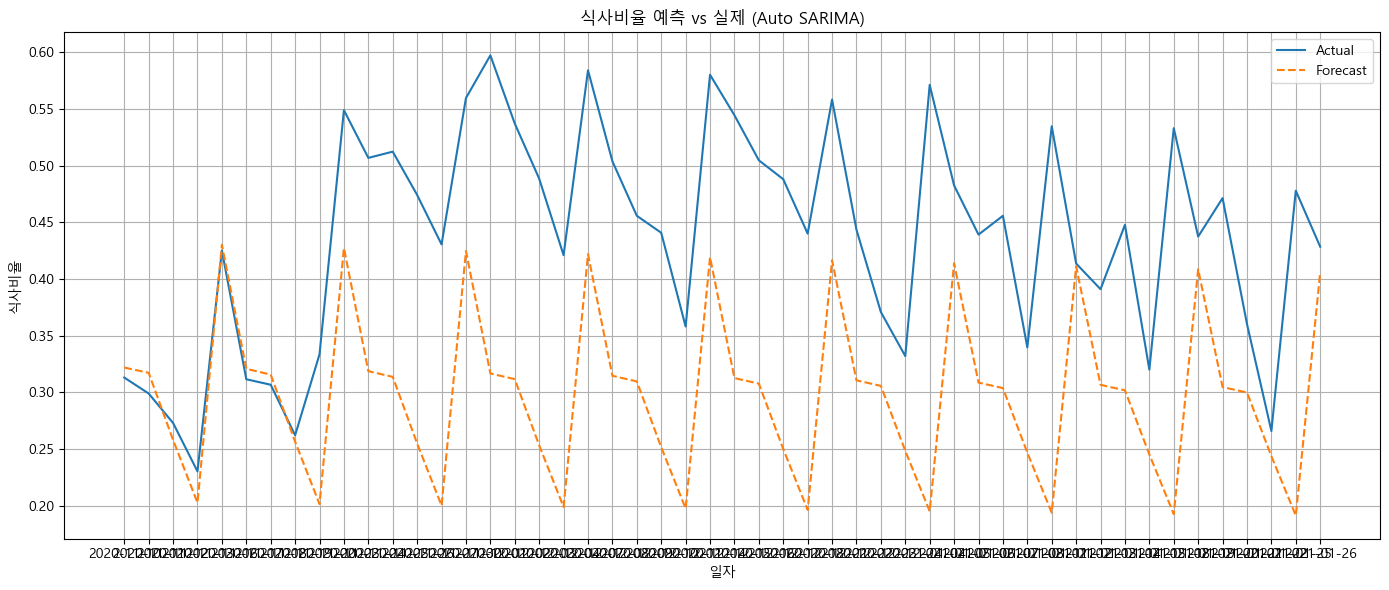

In [20]:
# 시각화
plt.figure(figsize=(14,6))
plt.plot(test.index, test['식사비율'], label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title('식사비율 예측 vs 실제 (Auto SARIMA)')
plt.xlabel('일자')
plt.ylabel('식사비율')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 4. ML 기반
- Random Forest

### 4-1. 데이터 전처리 및 분할

In [ ]:
data=pd.read_csv('./data/train.csv')

# 일자 관련 변수: 년도, 월, 일, 요일
year=[]
for i in range(len(data['일자'])) :
  year.append(data.iloc[i,0][0:4])
data['year']=year

mon=[]
for i in range(len(data['일자'])) :
  mon.append(data.iloc[i,0][5:7])
data['월']=mon

date=[]
for i in range(len(data['일자'])) :
  date.append(data.iloc[i,0][8:10])
data['date']=date

yoil=[]
for i in range(len(data)) : 
  if data.iloc[i,1]=='월' : yoil.append(0)
  if data.iloc[i,1]=='화' : yoil.append(1)
  if data.iloc[i,1]=='수' : yoil.append(2)
  if data.iloc[i,1]=='목' : yoil.append(3)
  if data.iloc[i,1]=='금' : yoil.append(4)
data['요일']=yoil

# 랜덤포레스트에서 categorical로 처리하기 위해 데이터 형변환
data['date']=data['date'].astype(int)
data['월']=data['월'].astype(int)
data['year']=data['year'].astype(int)

#필요한 컬럼 선택
data=data[['일자','year', '월', 'date', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', '중식메뉴', '중식계']]

make_menu_token(data)

##실질인원 산출 후 실질인원 대비 중식계의 비율을 식사비율로 정의
data['실질인원'] = data['본사정원수'] - data['본사휴가자수'] - data['본사출장자수'] - data['현본사소속재택근무자수']
data['식사비율'] = data['중식계']/data['실질인원']

# 선호지수를 원래 데이터에 매핑
## 메뉴-점수 매핑 딕셔너리 생성
score_map = dict(zip(menu_preference['메뉴명'], menu_preference['선호지수']))

## 점수 컬럼 추가
data['메인메뉴1_선호지수'] = data['메인메뉴1'].map(score_map)
data['메인메뉴2_선호지수'] = data['메인메뉴2'].map(score_map)
data['메인메뉴3_선호지수'] = data['메인메뉴3'].map(score_map)

data = data[['year', '월', 'date', '요일', '실질인원', '메인메뉴1_선호지수', '메인메뉴2_선호지수', '메인메뉴3_선호지수', '식사비율']]

In [34]:
train = data.iloc[:-300,]
test = data.iloc[-300:,]
train_Y = train.loc[:,'식사비율']
train_X = train.drop(['식사비율'],axis=1)
test_X = test.drop(['식사비율'],axis=1)

### 4-2. 파라미터 탐색 (생략)

### 4-3. 모델 학습 및 예측

In [35]:
rf_model = RandomForestRegressor(random_state=535,n_estimators=110,max_depth=7)
rf_model.fit(train_X, train_Y)

rf_predict = rf_model.predict(test_X)

### 4-4. 성능 평가

In [36]:
# 평가
mae = mean_absolute_error(test['식사비율'], rf_predict)
rmse = sqrt(mean_squared_error(test['식사비율'], rf_predict))
r2 = r2_score(test['식사비율'], rf_predict)

print(f"MAE  (평균 절대 오차):   {mae:.2f}")
print(f"RMSE (평균 제곱근 오차): {rmse:.2f}")
print(f"R²   (설명력):          {r2:.4f}")

MAE  (평균 절대 오차):   0.04
RMSE (평균 제곱근 오차): 0.06
R²   (설명력):          0.6193


### 4-5. 시각화: 예측값 vs 실제값

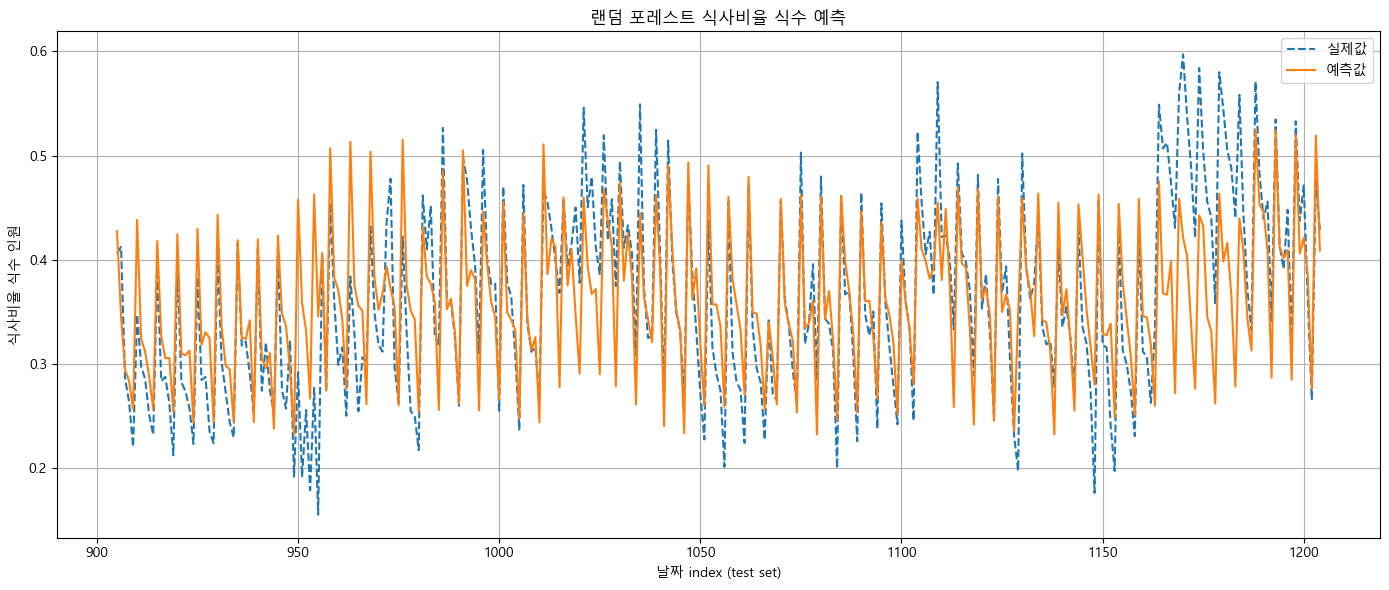

In [37]:
# 예측 결과 시각화
plt.figure(figsize=(14, 6))
plt.plot(test.index, test['식사비율'], label='실제값', linestyle='--')
plt.plot(test.index, rf_predict, label='예측값', linestyle='-')
plt.title('랜덤 포레스트 식사비율 식수 예측')
plt.xlabel('날짜 index (test set)')
plt.ylabel('식사비율 식수 인원')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. 하이브리드
Holt-Winters + Random Forest

In [ ]:
train_size = -300
train_series = data['식사비율'][:train_size]
test_series = data['식사비율'][train_size:]

### 5-1. Holt-Winters 예측

In [ ]:
hw_model = ExponentialSmoothing(train_series, trend='add', seasonal='add', seasonal_periods=5).fit()
hw_forecast = hw_model.forecast(len(test_series))
mse_hw = mean_squared_error(test_series, hw_forecast)

### 5-2. Random Forest 단독 예측

In [ ]:
X_train_rf = data[['실질인원', '메인메뉴1_선호지수', '메인메뉴2_선호지수', '메인메뉴3_선호지수']].iloc[:train_size]
y_train_rf = train_series
X_test_rf = data[['실질인원', '메인메뉴1_선호지수', '메인메뉴2_선호지수', '메인메뉴3_선호지수']].iloc[train_size:].reset_index(drop=True)
y_test_rf = test_series.reset_index(drop=True)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)
rf_forecast = rf_model.predict(X_test_rf)
mse_rf = mean_squared_error(y_test_rf, rf_forecast)

### 5-3. Hybrid 예측 (HW + RF for residuals)

In [ ]:
residuals = test_series.values - hw_forecast.values
y_resid = pd.Series(residuals).reset_index(drop=True)

rf_resid = RandomForestRegressor(n_estimators=100, random_state=42)
rf_resid.fit(X_test_rf, y_resid)  # 보정은 테스트 구간 외생 변수에 대해
rf_resid_preds = rf_resid.predict(X_test_rf)

final_pred = hw_forecast.reset_index(drop=True) + rf_resid_preds
mse_hybrid = mean_squared_error(test_series, final_pred)

### 5-4. 성능 평가

In [ ]:
print("📊 Mean Squared Error (Test Set):")
print(f"Holt-Winters only   : {mse_hw:.4f}")
print(f"Random Forest only  : {mse_rf:.4f}")
print(f"HW + RF (Hybrid)    : {mse_hybrid:.4f}")

📊 Mean Squared Error (Test Set):
Holt-Winters only   : 0.0135
Random Forest only  : 0.0042
HW + RF (Hybrid)    : 0.0009


### 5-5. 시각화: 예측값 vs 실제값

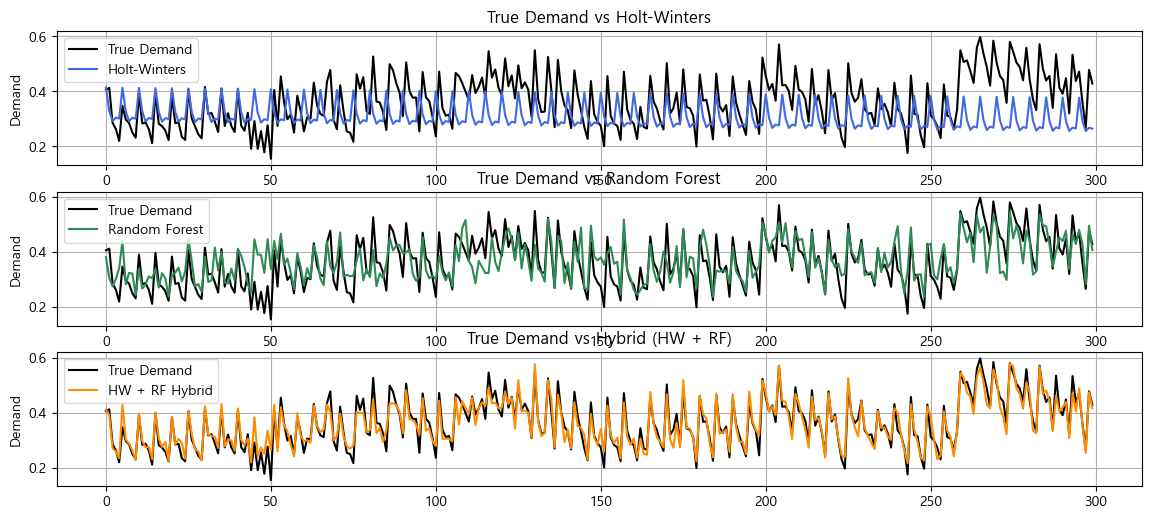

In [39]:
plt.figure(figsize=(14, 8))
# 1. True vs Holt-Winters
plt.subplot(4, 1, 1)
plt.plot(y_test_rf, label='True Demand', color='black')
plt.plot(hw_forecast.reset_index(drop=True), label='Holt-Winters', color='royalblue')
plt.title("True Demand vs Holt-Winters")
plt.ylabel("Demand")
plt.legend()
plt.grid(True)

# 2. True vs Random Forest
plt.subplot(4, 1, 2)
plt.plot(y_test_rf, label='True Demand', color='black')
plt.plot(rf_forecast, label='Random Forest', color='seagreen')
plt.title("True Demand vs Random Forest")
plt.ylabel("Demand")
plt.legend()
plt.grid(True)

# 3. True vs HW + RF Hybrid
plt.subplot(4, 1, 3)
plt.plot(y_test_rf, label='True Demand', color='black')
plt.plot(final_pred, label='HW + RF Hybrid', color='darkorange')
plt.title("True Demand vs Hybrid (HW + RF)")
plt.ylabel("Demand")
plt.legend()
plt.grid(True)

## 6. DL (참고)

In [26]:
data=pd.read_csv('./data/train.csv')

# 일자 관련 변수: 년도, 월, 일, 요일
year=[]
for i in range(len(data['일자'])) :
  year.append(data.iloc[i,0][0:4])
data['year']=year

mon=[]
for i in range(len(data['일자'])) :
  mon.append(data.iloc[i,0][5:7])
data['월']=mon

date=[]
for i in range(len(data['일자'])) :
  date.append(data.iloc[i,0][8:10])
data['date']=date

yoil=[]
for i in range(len(data)) : 
  if data.iloc[i,1]=='월' : yoil.append(0)
  if data.iloc[i,1]=='화' : yoil.append(1)
  if data.iloc[i,1]=='수' : yoil.append(2)
  if data.iloc[i,1]=='목' : yoil.append(3)
  if data.iloc[i,1]=='금' : yoil.append(4)
data['요일']=yoil

# 랜덤포레스트에서 categorical로 처리하기 위해 데이터 형변환
data['date']=data['date'].astype(int)
data['월']=data['월'].astype(int)
data['year']=data['year'].astype(int)

#필요한 컬럼 선택
data=data[['일자','year', '월', 'date', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', '중식메뉴', '중식계']]

make_menu_token(data)

##실질인원 산출 후 실질인원 대비 중식계의 비율을 식사비율로 정의
data['실질인원'] = data['본사정원수'] - data['본사휴가자수'] - data['본사출장자수'] - data['현본사소속재택근무자수']
data['식사비율'] = data['중식계']/data['실질인원']

# 선호지수를 원래 데이터에 매핑
## 메뉴-점수 매핑 딕셔너리 생성
score_map = dict(zip(menu_preference['메뉴명'], menu_preference['선호지수']))

## 점수 컬럼 추가
data['메인메뉴1_선호지수'] = data['메인메뉴1'].map(score_map)
data['메인메뉴2_선호지수'] = data['메인메뉴2'].map(score_map)
data['메인메뉴3_선호지수'] = data['메인메뉴3'].map(score_map)

data = data[['year', '월', 'date', '요일', '실질인원', '메인메뉴1_선호지수', '메인메뉴2_선호지수', '메인메뉴3_선호지수', '중식계', '식사비율']]

=== 구내식당 식수 인원 LSTM 예측 모델 ===

1. 기존 데이터 전처리...
총 데이터 개수: 1205개
컬럼: ['year', 'month', 'date', 'weekday', 'actual_count', 'menu1_pref', 'menu2_pref', 'menu3_pref', 'lunch_total', '식사비율', 'menu_pref_avg', 'menu_pref_max', 'menu_pref_min', 'menu_pref_std']

2. Train/Test 데이터 분할...
Train 데이터: 905개
Test 데이터: 300개

3. 특성 스케일링...
타겟 변수: 중식계
메뉴 선호도 특성 추가됨
사용 특성: ['lunch_total', 'menu_pref_avg', 'menu_pref_max', 'menu_pref_min', 'menu_pref_std']

4. 시퀀스 데이터 생성...
X_train shape: (900, 5, 5)
y_train shape: (900,)

5. LSTM 모델 학습...
Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1897 - mae: 0.3817 - val_loss: 0.0518 - val_mae: 0.1882
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0439 - mae: 0.1694 - val_loss: 0.0339 - val_mae: 0.1470
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0345 - mae: 0.1493 - val_loss: 0.0350 - val_mae: 0.1486
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0344 - mae: 0.1446 - val_loss: 0.0337 - val_mae: 0.1457
Epoch

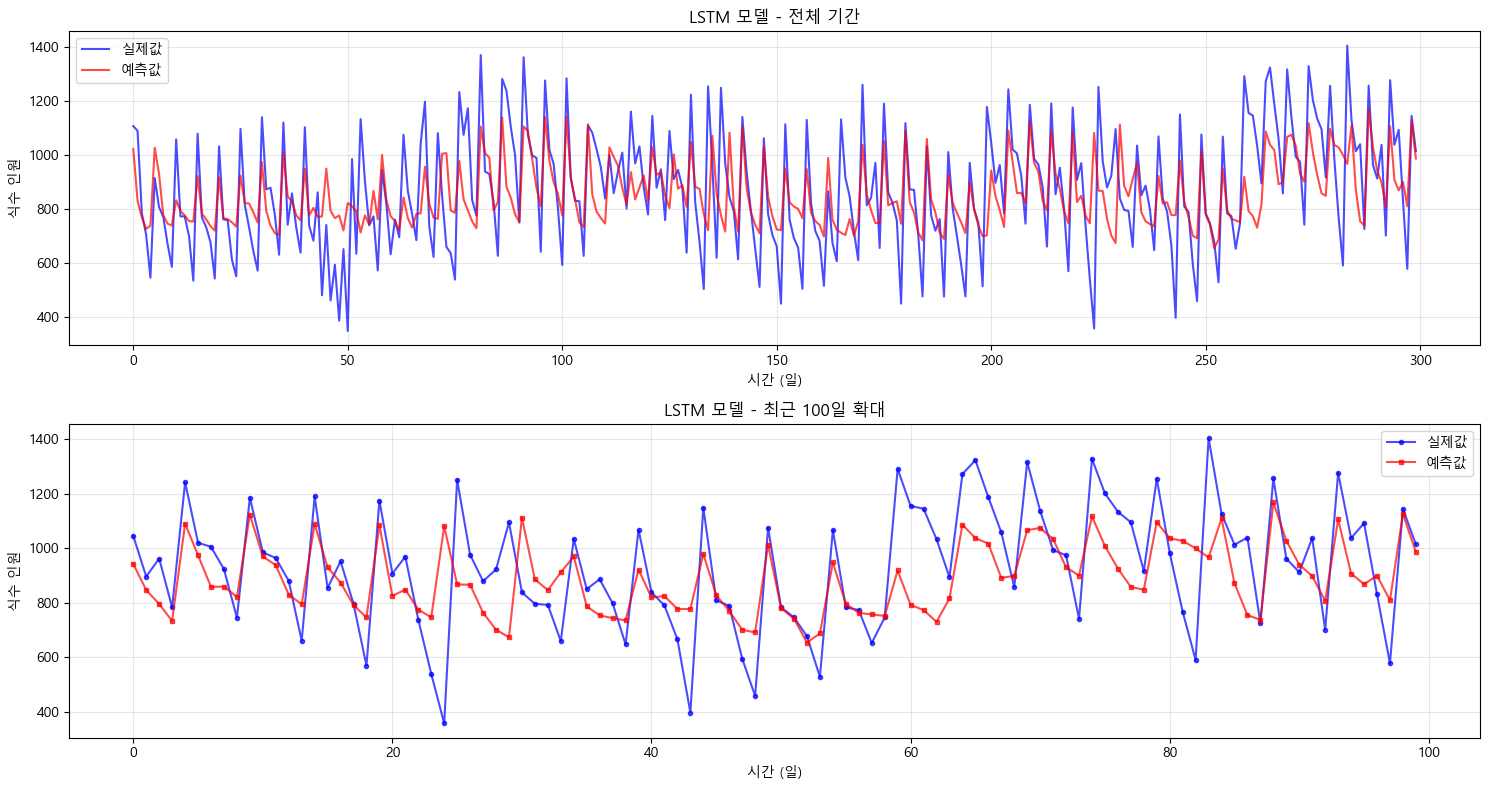

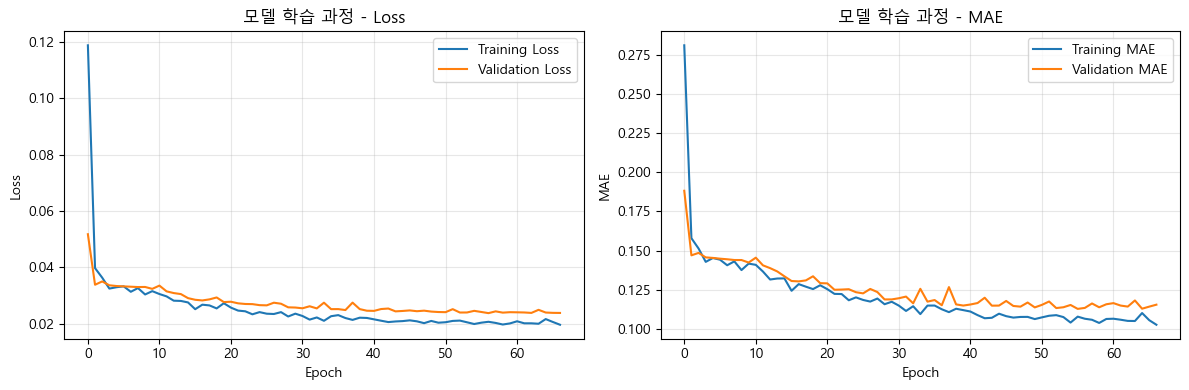

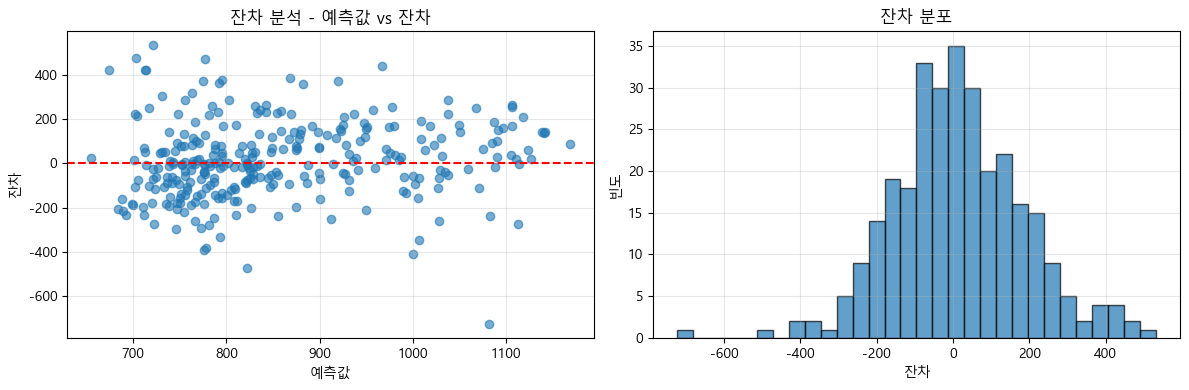

In [27]:
# 기존 데이터프레임 전처리 함수
def preprocess_existing_data(df):
    """
    기존 데이터프레임을 전처리
    컬럼: year, 월, date, 요일, 실질인원, 메인메뉴1_선호지수, 메인메뉴2_선호지수, 메인메뉴3_선호지수, 중식계
    """
    # 컬럼명 정리
    df_processed = df.copy()
    
    # 컬럼명이 한글인 경우 영문으로 매핑
    column_mapping = {
        '월': 'month',
        '요일': 'weekday', 
        '실질인원': 'actual_count',
        '메인메뉴1_선호지수': 'menu1_pref',
        '메인메뉴2_선호지수': 'menu2_pref', 
        '메인메뉴3_선호지수': 'menu3_pref',
        '중식계': 'lunch_total'
    }
    
    # 컬럼명 변경
    for old_name, new_name in column_mapping.items():
        if old_name in df_processed.columns:
            df_processed = df_processed.rename(columns={old_name: new_name})
    
    # 메뉴 선호도 평균
    if all(col in df_processed.columns for col in ['menu1_pref', 'menu2_pref', 'menu3_pref']):
        df_processed['menu_pref_avg'] = (df_processed['menu1_pref'] + 
                                       df_processed['menu2_pref'] + 
                                       df_processed['menu3_pref']) / 3
        df_processed['menu_pref_max'] = df_processed[['menu1_pref', 'menu2_pref', 'menu3_pref']].max(axis=1)
        df_processed['menu_pref_min'] = df_processed[['menu1_pref', 'menu2_pref', 'menu3_pref']].min(axis=1)
        df_processed['menu_pref_std'] = df_processed[['menu1_pref', 'menu2_pref', 'menu3_pref']].std(axis=1)
    
    return df_processed

def create_sequences(data, target_col, feature_cols, sequence_length=30):
    """
    시계열 데이터를 LSTM 입력 형태로 변환
    """
    X, y = [], []
    
    for i in range(sequence_length, len(data)):
        # 과거 sequence_length일 동안의 특성들
        X.append(data[feature_cols].iloc[i-sequence_length:i].values)
        # 예측할 타겟값
        y.append(data[target_col].iloc[i])
    
    return np.array(X), np.array(y)

def build_lstm_model(input_shape):
    """
    LSTM 모델 구성
    """
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    
    return model

def evaluate_model(y_true, y_pred):
    """
    모델 평가 지표 계산
    """
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    return mae, rmse, r2

def plot_predictions(y_true, y_pred, title="LSTM 예측 결과"):
    """
    예측 결과 시각화
    """
    rcParams['font.family'] = 'Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] = False  # 음수 기호 깨짐 방지
    
    plt.figure(figsize=(15, 8))
    
    # 전체 기간 비교
    plt.subplot(2, 1, 1)
    plt.plot(y_true, label='실제값', color='blue', alpha=0.7)
    plt.plot(y_pred, label='예측값', color='red', alpha=0.7)
    plt.title(f'{title} - 전체 기간')
    plt.xlabel('시간 (일)')
    plt.ylabel('식수 인원')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 마지막 100일 확대
    plt.subplot(2, 1, 2)
    last_100 = min(100, len(y_true))
    plt.plot(y_true[-last_100:], label='실제값', color='blue', alpha=0.7, marker='o', markersize=3)
    plt.plot(y_pred[-last_100:], label='예측값', color='red', alpha=0.7, marker='s', markersize=3)
    plt.title(f'{title} - 최근 {last_100}일 확대')
    plt.xlabel('시간 (일)')
    plt.ylabel('식수 인원')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# 메인 실행 코드 (기존 데이터프레임 사용)
def main(data):
    print("=== 구내식당 식수 인원 LSTM 예측 모델 ===\n")
    
    # 1. 기존 데이터 전처리
    print("1. 기존 데이터 전처리...")
    df = preprocess_existing_data(data)
    print(f"총 데이터 개수: {len(df)}개")
    print(f"컬럼: {list(df.columns)}")
    
    # 2. Train/Test 분할 (뒤 300개를 테스트 세트로)
    print("\n2. Train/Test 데이터 분할...")
    train_size = len(df) - 300
    train_df = df[:train_size].copy()
    test_df = df[train_size:].copy()
    
    print(f"Train 데이터: {len(train_df)}개")
    print(f"Test 데이터: {len(test_df)}개")
    
    # 3. 특성 선택 및 스케일링
    print("\n3. 특성 스케일링...")
    
    # 타겟 변수 결정 (중식계가 있으면 중식계 사용, 없으면 실질인원 사용)
    if 'lunch_total' in df.columns:
        target_col = 'lunch_total'
        print("타겟 변수: 중식계")
    else:
        target_col = 'actual_count'
        print("타겟 변수: 실질인원")
    
    # 사용할 특성 선택
    base_features = [target_col]
    
    # 메뉴 선호도 특성이 있다면 추가
    menu_features = []
    if 'menu_pref_avg' in df.columns:
        menu_features = ['menu_pref_avg', 'menu_pref_max', 'menu_pref_min', 'menu_pref_std']
        base_features.extend(menu_features)
        print("메뉴 선호도 특성 추가됨")
    
    feature_cols = base_features
    print(f"사용 특성: {feature_cols}")
    
    # 스케일러 정의
    scaler_features = MinMaxScaler()
    scaler_target = MinMaxScaler()
    
    # Train 데이터로 스케일러 학습
    train_features_scaled = scaler_features.fit_transform(train_df[feature_cols])
    train_target_scaled = scaler_target.fit_transform(train_df[[target_col]])
    
    # 스케일링된 데이터를 DataFrame으로 변환
    train_scaled_df = pd.DataFrame(train_features_scaled, columns=feature_cols)
    train_scaled_df[target_col] = train_target_scaled.flatten()
    
    # 4. 시퀀스 데이터 생성
    print("\n4. 시퀀스 데이터 생성...")
    sequence_length = 5  # 30일 시퀀스
    X_train, y_train = create_sequences(train_scaled_df, target_col, feature_cols, sequence_length)
    
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    
    # 5. LSTM 모델 구성 및 학습
    print("\n5. LSTM 모델 학습...")
    model = build_lstm_model((sequence_length, len(feature_cols)))
    
    # 조기 종료 콜백
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
    
    # 모델 학습
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )
    
    # 6. 테스트 데이터 예측
    print("\n6. 테스트 데이터 예측...")
    
    # 전체 데이터 스케일링 (테스트 예측을 위해)
    all_features_scaled = scaler_features.transform(df[feature_cols])
    all_scaled_df = pd.DataFrame(all_features_scaled, columns=feature_cols)
    all_scaled_df[target_col] = scaler_target.transform(df[[target_col]]).flatten()
    
    # 테스트 시퀀스 생성
    test_start_idx = train_size - sequence_length
    test_data = all_scaled_df[test_start_idx:train_size + len(test_df)]
    X_test, y_test = create_sequences(test_data, target_col, feature_cols, sequence_length)
    
    # 예측 수행
    y_pred_scaled = model.predict(X_test)
    
    # 스케일 복원
    y_test_original = scaler_target.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred_original = scaler_target.inverse_transform(y_pred_scaled).flatten()
    
    # 7. 모델 평가
    print("\n7. 모델 평가...")
    mae, rmse, r2 = evaluate_model(y_test_original, y_pred_original)
    
    print(f"MAE (평균 절대 오차): {mae:.2f}")
    print(f"RMSE (평균제곱근 오차): {rmse:.2f}")
    print(f"R² (결정계수): {r2:.4f}")
    
    # 8. 결과 시각화
    print("\n8. 결과 시각화...")
    plot_predictions(y_test_original, y_pred_original, "LSTM 모델")
    
    # 9. 학습 과정 시각화
    rcParams['font.family'] = 'Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] = False  # 음수 기호 깨짐 방지
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('모델 학습 과정 - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('모델 학습 과정 - MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 10. 잔차 분석
    residuals = y_test_original - y_pred_original
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.scatter(y_pred_original, residuals, alpha=0.6)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('예측값')
    plt.ylabel('잔차')
    plt.title('잔차 분석 - 예측값 vs 잔차')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.hist(residuals, bins=30, alpha=0.7, edgecolor='black')
    plt.xlabel('잔차')
    plt.ylabel('빈도')
    plt.title('잔차 분포')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return model, scaler_features, scaler_target, mae, rmse, r2

# 실행 함수 (기존 데이터프레임 사용)
def run_lstm_prediction(data):
    """
    기존 데이터프레임을 사용하여 LSTM 예측 실행
    
    Parameters:
    data: pandas DataFrame - 기존 데이터 (컬럼: year, 월, date, 요일, 실질인원, 메인메뉴1_선호지수, 메인메뉴2_선호지수, 메인메뉴3_선호지수, 중식계)
    
    Returns:
    model, scaler_features, scaler_target, mae, rmse, r2
    """
    return main(data)

model, scaler_features, scaler_target, mae, rmse, r2 = run_lstm_prediction(data)